# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
total_number_mice = combined_df["Mouse ID"].nunique()
total_number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] !="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = clean_df["Mouse ID"].nunique()

total_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_by_aggregation =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_by_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

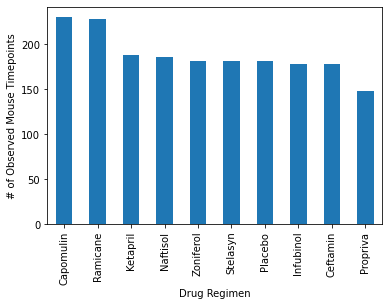

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

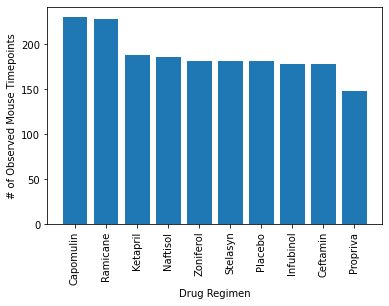

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, alpha=1, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()


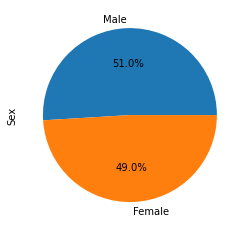

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

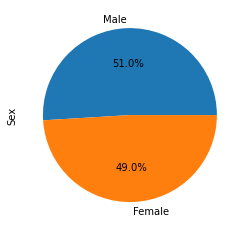

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
gender_data = clean_df["Sex"].value_counts()
plt.pie(gender_data, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_frames= [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_treatments = pd.concat(data_frames)
merged_df = pd.merge(four_treatments,max_time, on="Mouse ID")
merged_df["MaxTime"] = merged_df["Timepoint_x"] == merged_df["Timepoint_y"]
merged_df.drop(merged_df.loc[merged_df['MaxTime']==False].index, inplace=True)
timepoint_tumor_df = merged_df[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
timepoint_tumor_df


,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
17,j246,Capomulin,35,38.753265
27,r554,Capomulin,45,32.377357
37,s185,Capomulin,45,23.343598
47,b742,Capomulin,45,38.939633
...,...,...,...,...
787,p438,Ceftamin,45,61.433892
793,b487,Ceftamin,25,56.057749
803,o287,Ceftamin,45,59.741901
812,q483,Ceftamin,40,64.192341


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatment:
    volume = timepoint_tumor_df.loc[timepoint_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) <2:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64).
The outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64).
The outliers for Infubinol are 459    36.321346
Name: Tumor Volume (mm3), dtype: float64.
The outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64).


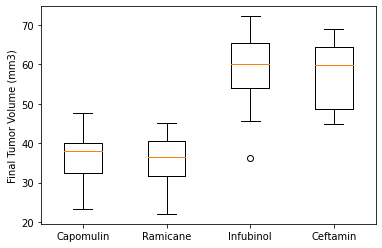

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume,sym="o",labels = drug_treatment)

plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

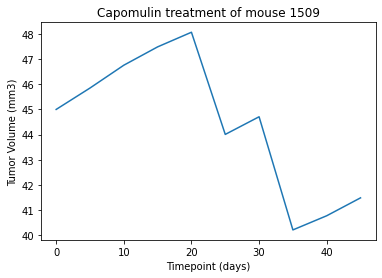

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse1509 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]

x = mouse1509["Timepoint"]
y = mouse1509["Tumor Volume (mm3)"]

plt.plot(x, y,label="Mouse ID 1509")
plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

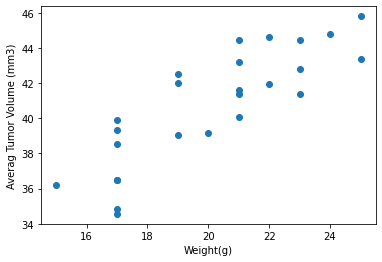

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


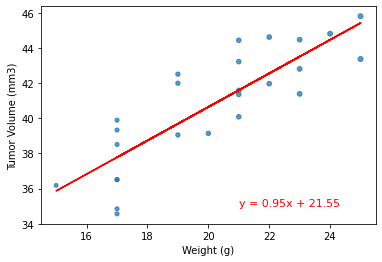

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_capm_vol["Weight (g)"]
y_values = avg_capm_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(21,35),fontsize=11,color="red")

plt.scatter(x_values, y_values,s=x_values, alpha=0.75)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_values,regress_values,"r-")
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

# Observations 

•	A total of 248 mice were treated for this study.

•	Ovserved Mice timepoints treated with Capomulin where the highest (over 200) compere to those treated with Propriva wich was the lowest and reached just over 150.

•	Acoording to stadistical analyisis the mice treated with Capomulin or Ramicane showed smaller tumors in average.

•	The correlation between mouse weight, and average tumor volume "r" is 0.84, which shows there is a strong positive correlation, between the mouse weight and the average tumor volume.

•	The regression analysis helped us to understand how much the average tumor volume (y) will change when weight of mice change(x). The following equation can be used to predict tumor volume as a funtion of weight y=0.95x+21.55